#  **Data Visualizations**

## **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#Sklearn preprocessing
from sklearn import preprocessing,set_config
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler,LabelEncoder
#Scipy
from scipy import stats
from scipy.stats import norm

#Sklearn Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import preprocessing, set_config
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.decomposition import PCA


# Warnings 
import warnings 
warnings.filterwarnings("ignore")

# Configuring diagrams
set_config(display = 'diagram')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Beastmode225\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load NYC Restaraunt Data 
rd =pd.read_csv('rd')

In [3]:
# Check to see if Data Loaded Properly
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  209222 non-null  int64  
 1   DBA                    208622 non-null  object 
 2   BORO                   209222 non-null  object 
 3   BUILDING               208905 non-null  object 
 4   STREET                 209216 non-null  object 
 5   ZIPCODE                206539 non-null  float64
 6   CUISINE DESCRIPTION    206788 non-null  object 
 7   INSPECTION DATE        209222 non-null  object 
 8   ACTION                 206788 non-null  object 
 9   VIOLATION CODE         205639 non-null  object 
 10  VIOLATION DESCRIPTION  205639 non-null  object 
 11  CRITICAL FLAG          209222 non-null  object 
 12  SCORE                  199283 non-null  float64
 13  GRADE                  102539 non-null  object 
 14  GRADE DATE             93926 non-nul

# **Data Cleaning**

In [4]:
# Function to clean restaurant names
def clean_restaurant_name(name):
    # check if the input is a string 
    if isinstance(name, str):
        # Remove store numbers using regular expression 
        cleaned_name = re.sub(r'#\d+','', name)
        # Remove all numeric characters 
        cleaned_name = re.sub(r'#\d+', '', cleaned_name)
        #Remove leading and trailing whitespace
        cleaned_name = cleaned_name.strip()
        return cleaned_name
    else:
        return name #Return the input unchanged for non-string values
# Apply the clean_restaurant_name function to the 'DBA' column
rd['Cleaned Restaurant Name'] = rd['DBA'].apply(clean_restaurant_name)
# Drop the origianl 'DBA' column if you want 
#rd.drop(columns=['DBA'], inplace = True)

In [5]:
# checking missing data in data 
def check_missing_data(rd):
    total = rd.isnull().sum().sort_values(ascending=False)
    percent = (rd.isnull().sum() / rd.isnull().count() * 100).sort_values(ascending=False)
    percent = percent.round(2).astype(str) + '%'  # Add the percentage sign
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(rd)
missing_data_result.head()

,Total,Percent
GRADE DATE,115296,55.11%
GRADE,106683,50.99%
SCORE,9939,4.75%
VIOLATION DESCRIPTION,3583,1.71%
VIOLATION CODE,3583,1.71%


In [6]:
# Checking for duplicates 
rd.duplicated().sum()

6

In [7]:
rd['SCORE'].describe()

count    199283.000000
mean         22.811695
std          17.529139
min           0.000000
25%          11.000000
50%          19.000000
75%          31.000000
max         168.000000
Name: SCORE, dtype: float64

In [8]:
rd['CAMIS'].value_counts()

CAMIS
40398688    65
41406895    59
50045647    56
40365904    52
50111296    49
            ..
50135476     1
50124778     1
50143806     1
50144055     1
50083295     1
Name: count, Length: 28385, dtype: int64

In [9]:
rd['INSPECTION TYPE'].value_counts()

INSPECTION TYPE
Cycle Inspection / Initial Inspection                          113380
Cycle Inspection / Re-inspection                                37160
Pre-permit (Operational) / Initial Inspection                   31233
Pre-permit (Operational) / Re-inspection                         9624
Administrative Miscellaneous / Initial Inspection                4930
Pre-permit (Non-operational) / Initial Inspection                2600
Pre-permit (Operational) / Compliance Inspection                 1634
Cycle Inspection / Reopening Inspection                          1402
Administrative Miscellaneous / Re-inspection                      985
Pre-permit (Operational) / Reopening Inspection                   746
Cycle Inspection / Compliance Inspection                          740
Smoke-Free Air Act / Initial Inspection                           553
Trans Fat / Initial Inspection                                    384
Calorie Posting / Initial Inspection                              327
Inte

In [10]:
# Looking at different Restaurant Types, Potential to filter out specific types for geospacial analysis
all_unique_values = rd['CUISINE DESCRIPTION'].unique()
print(all_unique_values)

[nan 'Spanish' 'Italian' 'Sandwiches/Salads/Mixed Buffet' 'Tex-Mex'
 'Coffee/Tea' 'Chinese' 'Frozen Desserts' 'Donuts' 'Asian/Asian Fusion'
 'American' 'Bakery Products/Desserts' 'Japanese' 'Irish' 'Caribbean'
 'Latin American' 'Pizza' 'Vegetarian' 'Other' 'Middle Eastern'
 'Juice, Smoothies, Fruit Salads' 'African' 'French' 'Chicken'
 'Jewish/Kosher' 'Mexican' 'Korean' 'Hawaiian' 'Hamburgers' 'Ethiopian'
 'Turkish' 'Mediterranean' 'Creole/Cajun' 'Barbecue' 'Sandwiches'
 'Brazilian' 'Seafood' 'Greek' 'Thai' 'Salads' 'Peruvian'
 'Southeast Asian' 'Soul Food' 'Bottled Beverages' 'Steakhouse' 'Indian'
 'German' 'Creole' 'Chinese/Japanese' 'Moroccan' 'Bagels/Pretzels'
 'Fusion' 'Russian' 'Continental' 'Hotdogs/Pretzels' 'Bangladeshi'
 'Haute Cuisine' 'Cajun' 'Pakistani' 'Tapas' 'Polish' 'Soups' 'English'
 'Eastern European' 'Hotdogs' 'Pancakes/Waffles' 'Filipino' 'Australian'
 'Soups/Salads/Sandwiches' 'Egyptian' 'Vegan' 'Not Listed/Not Applicable'
 'Afghan' 'New American' 'Chinese/Cuban' 

## **Grade Date by Year**

In [11]:
# Convert the 'GRADE DATE' column to datetime type
rd['GRADE DATE'] = pd.to_datetime(rd['GRADE DATE'])

# Filter rows for the year 2016
desired_year = 2016 
filtered_df = rd[rd['GRADE DATE'].dt.year == desired_year]

# Display the rows for the specified year
print (filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 78 to 208311
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CAMIS                    264 non-null    int64         
 1   DBA                      264 non-null    object        
 2   BORO                     264 non-null    object        
 3   BUILDING                 257 non-null    object        
 4   STREET                   264 non-null    object        
 5   ZIPCODE                  201 non-null    float64       
 6   CUISINE DESCRIPTION      264 non-null    object        
 7   INSPECTION DATE          264 non-null    object        
 8   ACTION                   264 non-null    object        
 9   VIOLATION CODE           227 non-null    object        
 10  VIOLATION DESCRIPTION    227 non-null    object        
 11  CRITICAL FLAG            264 non-null    object        
 12  SCORE                    264 non-null

In [12]:
# Convert the 'GRADE DATE' column to datetime type
rd['INSPECTION DATE'] = pd.to_datetime(rd['INSPECTION DATE'])

# Filter rows for the year 2016
desired_year = 2023 
filtered_df = rd[rd['INSPECTION DATE'].dt.year == desired_year]

# Display the rows for the specified year
print (filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 78256 entries, 62 to 209221
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CAMIS                    78256 non-null  int64         
 1   DBA                      78256 non-null  object        
 2   BORO                     78256 non-null  object        
 3   BUILDING                 78199 non-null  object        
 4   STREET                   78256 non-null  object        
 5   ZIPCODE                  77486 non-null  float64       
 6   CUISINE DESCRIPTION      78256 non-null  object        
 7   INSPECTION DATE          78256 non-null  datetime64[ns]
 8   ACTION                   78256 non-null  object        
 9   VIOLATION CODE           77850 non-null  object        
 10  VIOLATION DESCRIPTION    77850 non-null  object        
 11  CRITICAL FLAG            78256 non-null  object        
 12  SCORE                    74646 non-

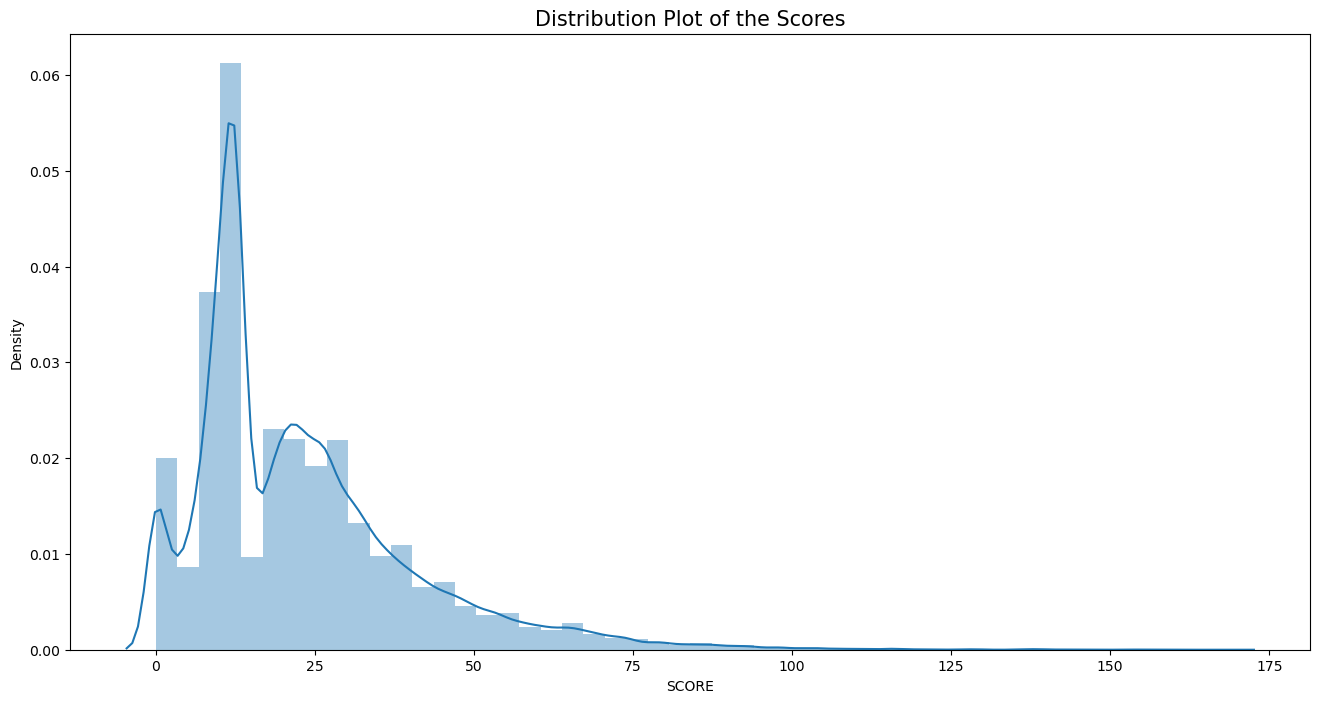

In [13]:
# Have a look at a distribution plot of the Score
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
sns.distplot(rd.SCORE.dropna())
plt.title("Distribution Plot of the Scores", fontsize=15);

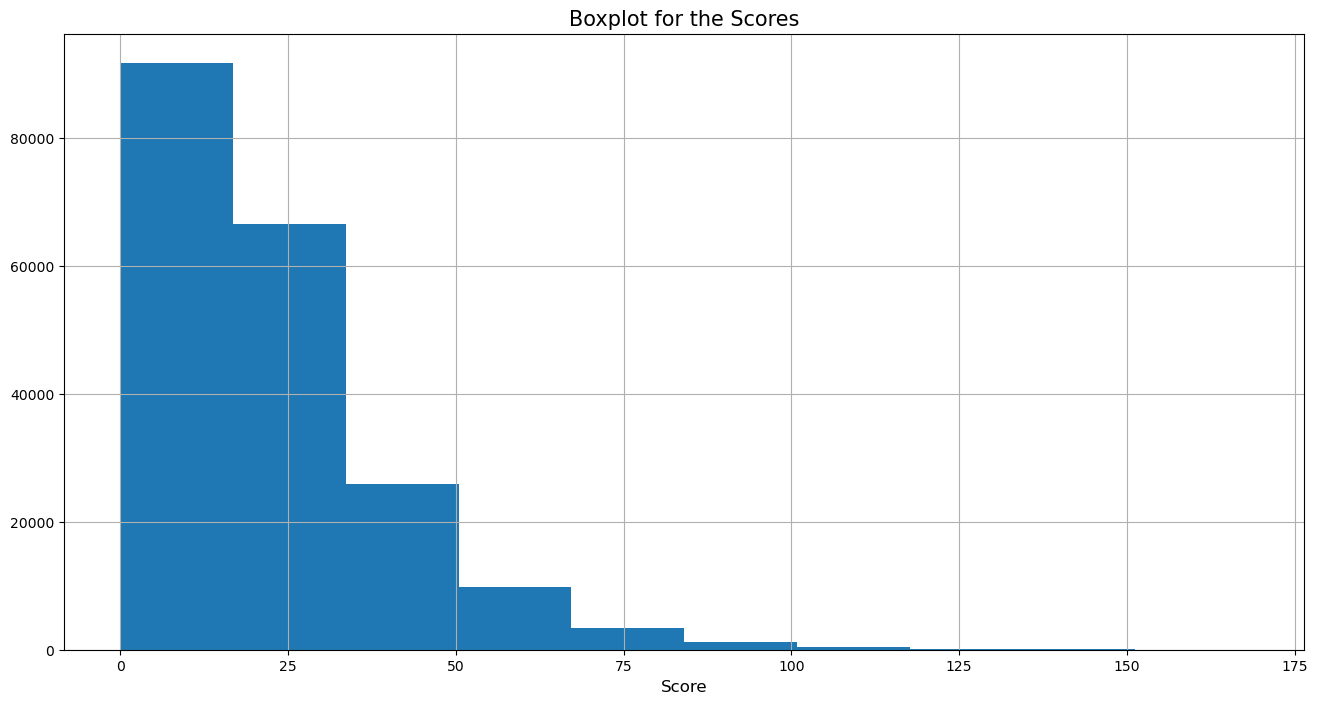

In [14]:
# Plot a histogram
rd.SCORE.hist(figsize=(16,8))
plt.title("Boxplot for the Scores", fontsize=15)
plt.xlabel('Score', fontsize = 12);

In [15]:
# Filter rows where 'BORO' is 0
f_df = rd[rd['BORO'] != '0']

# Display the filtered DataFrame
print(f_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 209211 entries, 0 to 209221
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CAMIS                    209211 non-null  int64         
 1   DBA                      208620 non-null  object        
 2   BORO                     209211 non-null  object        
 3   BUILDING                 208900 non-null  object        
 4   STREET                   209211 non-null  object        
 5   ZIPCODE                  206534 non-null  float64       
 6   CUISINE DESCRIPTION      206788 non-null  object        
 7   INSPECTION DATE          209211 non-null  datetime64[ns]
 8   ACTION                   206788 non-null  object        
 9   VIOLATION CODE           205639 non-null  object        
 10  VIOLATION DESCRIPTION    205639 non-null  object        
 11  CRITICAL FLAG            209211 non-null  object        
 12  SCORE                

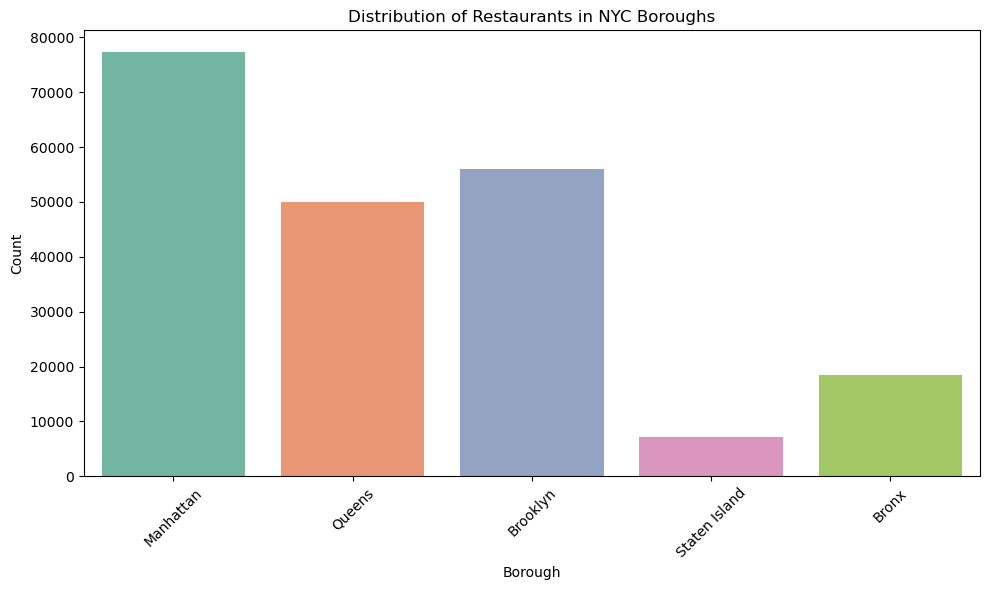

In [16]:
# Visualizing Distribution of Restaurants in NYC Boroughs
plt.figure(figsize=(10, 6))
sns.countplot(data=f_df, x='BORO', palette='Set2') 
plt.title('Distribution of Restaurants in NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

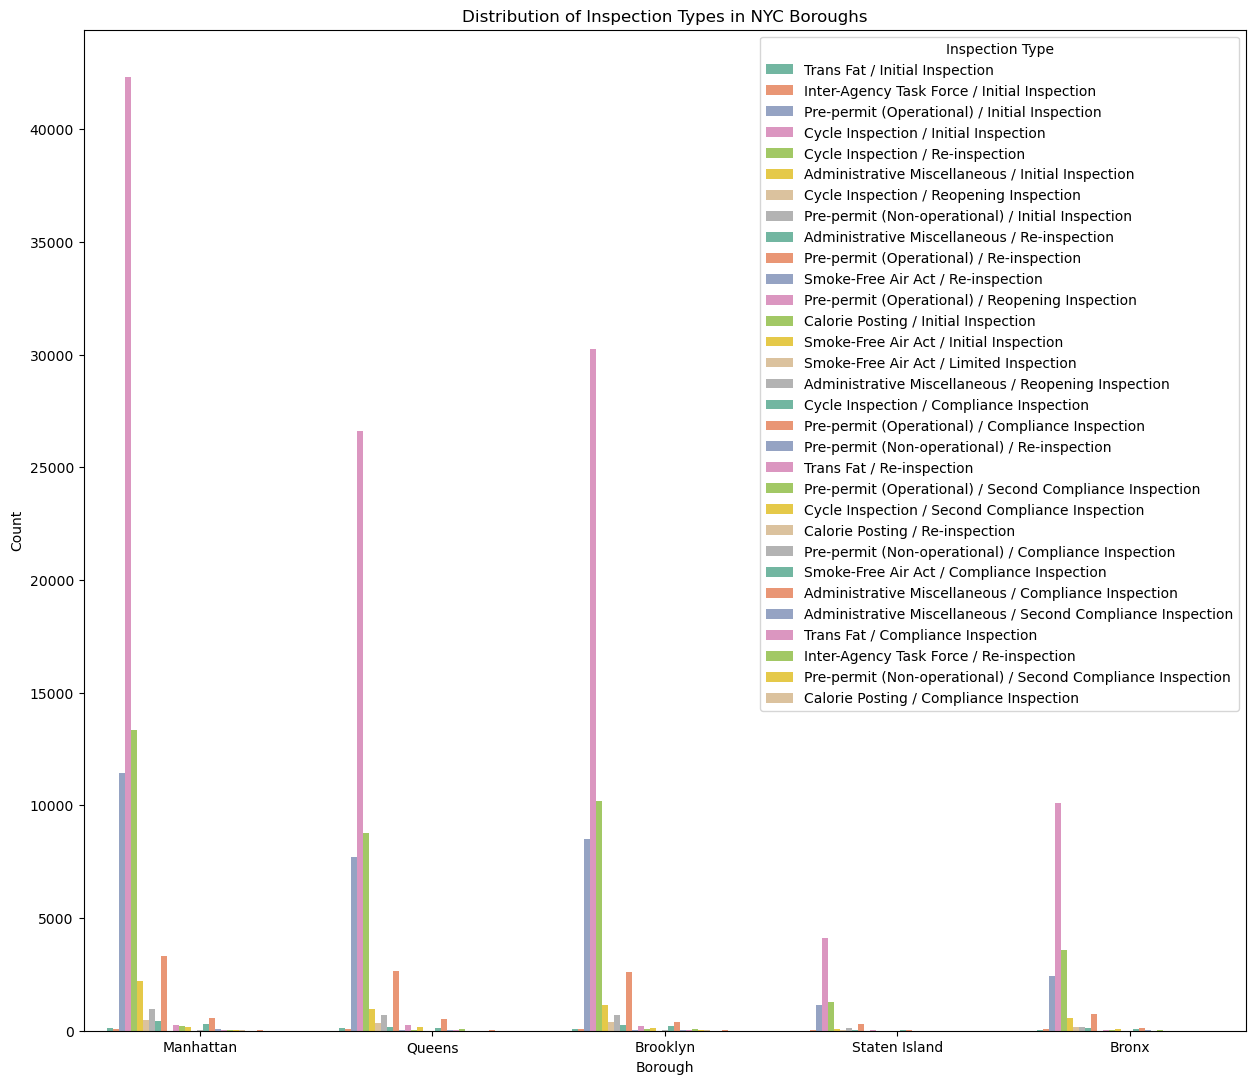

In [17]:
# Create a stacked bar chart using Seaborn
plt.figure(figsize=(15,13))
sns.countplot(x='BORO', hue='INSPECTION TYPE', data=f_df, palette='Set2')
plt.title('Distribution of Inspection Types in NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
# Show the plot
plt.legend(title='Inspection Type', bbox_to_anchor=(1, 1), loc='upper right')
plt.show()

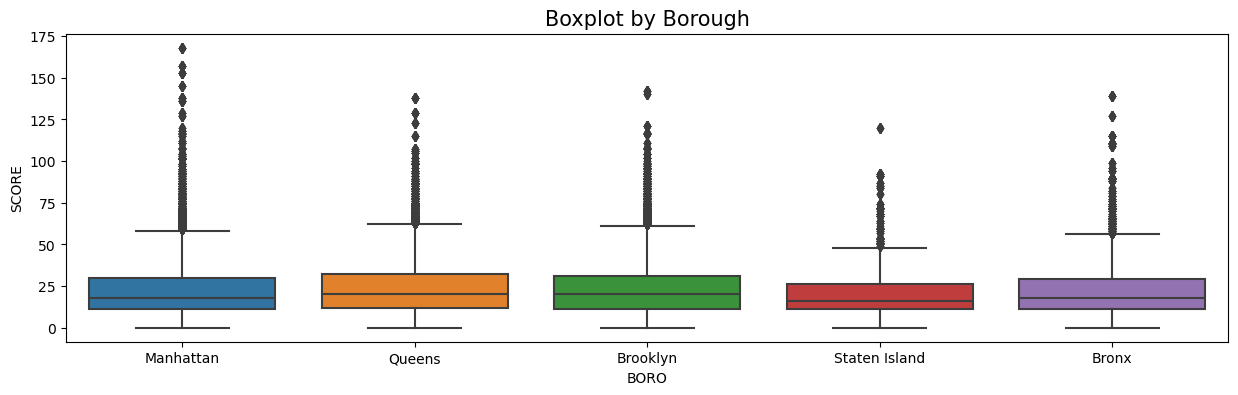

In [18]:
# Create a boxplot using Seaborn
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(x='BORO', y='SCORE', data=f_df)
plt.title('Boxplot by Borough', fontsize=15)

# Show the plot
plt.show()

## **Grade**

In [19]:
# Contingency table for Grade and Borough
boro_grade = pd.crosstab(rd.GRADE, rd.BORO, margins = True)
boro_grade

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
GRADE,,,,,,
A,6031,18440,27077,16679,2944,71171
B,1154,3046,3933,2905,398,11436
C,526,1827,2399,1856,139,6747
N,749,2008,3352,2227,296,8632
P,45,165,211,134,13,568
Z,513,1024,1211,1097,140,3985
All,9018,26510,38183,24898,3930,102539


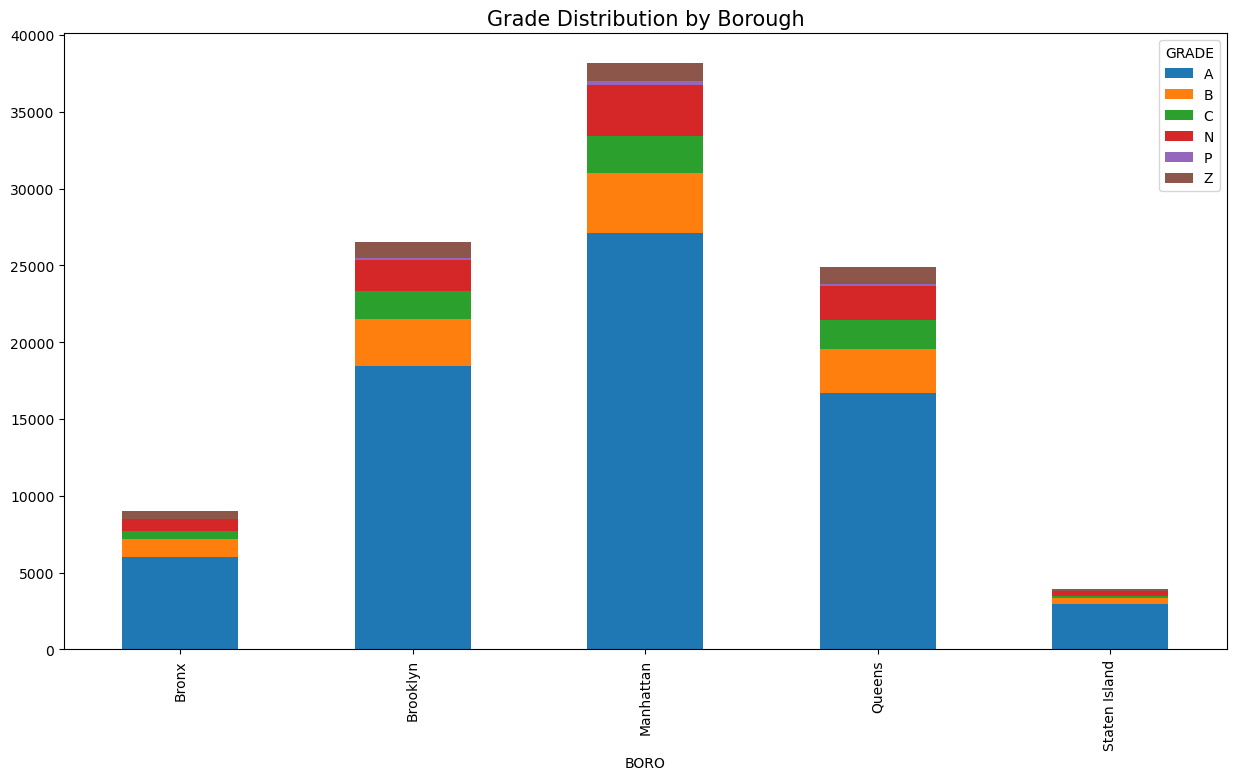

In [20]:
# Plot of grade by borough
pd.crosstab(rd.BORO, rd.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15);

In [21]:
# Create a bar chart
#plt.figure(figsize=(12, 6))
#plt.bar(top_15_df['DBA'], top_15_df['CAMIS_Count'])
#plt.xlabel('DBA (Doing Business As)')
#plt.ylabel('Number of Restaurants')
#plt.title('Top 15 DBAs with the Most Restaurants')
#plt.xticks(rotation=90)
#plt.tight_layout()

# Show the plot
#plt.show

In [22]:
# Contingency table for Grade and Borough
boro_grade = pd.crosstab(rd.GRADE, rd.BORO, margins = True)
boro_grade

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
GRADE,,,,,,
A,6031,18440,27077,16679,2944,71171
B,1154,3046,3933,2905,398,11436
C,526,1827,2399,1856,139,6747
N,749,2008,3352,2227,296,8632
P,45,165,211,134,13,568
Z,513,1024,1211,1097,140,3985
All,9018,26510,38183,24898,3930,102539


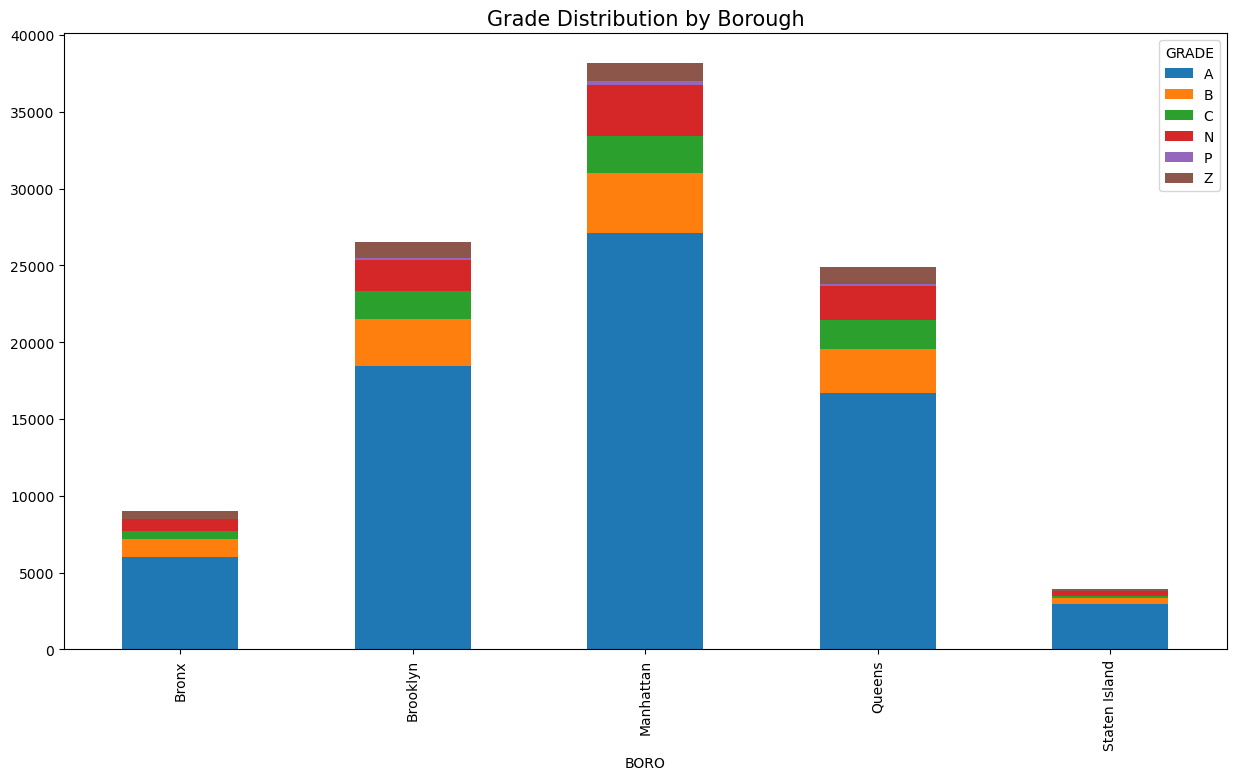

In [23]:
# Plot of grade by borough
pd.crosstab(rd.BORO, rd.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15);

In [24]:
# Test if the grades are independent of the borough
boro_grade.columns = ["BRONX","BROOKLYN","MANHATTAN", "QUEENS", "STATEN ISLAND" ,"All"]

boro_grade.index = ["A","B","C","Not Yet Graded","P", "Z", "All"]

observed = boro_grade.iloc[0:6,0:5]   # Get table without totals for later use

expected =  np.outer(boro_grade["All"][0:6],
                     boro_grade.loc["All"][0:5]) / 1000

expected = pd.DataFrame(expected)

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print("Chi Squared Stat")
print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 20)   # (5-1) * (6-1)

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=20)
print("P value")
print(p_value)

stats.chi2_contingency(observed= observed)

Chi Squared Stat
0.0
Critical value
31.410432844230918
P value
1.0


Chi2ContingencyResult(statistic=409.65097394981615, pvalue=2.0301499767120024e-74, dof=20, expected_freq=array([[6.25927772e+03, 1.84002498e+04, 2.65023288e+04, 1.72813813e+04,
        2.72776241e+03],
       [1.00576218e+03, 2.95661514e+03, 4.25848495e+03, 2.77683153e+03,
        4.38306205e+02],
       [5.93378578e+02, 1.74434088e+03, 2.51241675e+03, 1.63827233e+03,
        2.58591463e+02],
       [7.59158720e+02, 2.23168082e+03, 3.21434436e+03, 2.09597847e+03,
        3.30837633e+02],
       [4.99539102e+01, 1.46848321e+02, 2.11509221e+02, 1.37918880e+02,
        2.17696681e+01],
       [3.50468895e+02, 1.03026507e+03, 1.48391592e+03, 9.67617492e+02,
        1.52732619e+02]]))

## **Distribution of Grades**

Text(0.5, 1.0, 'Boxplot by Grade')

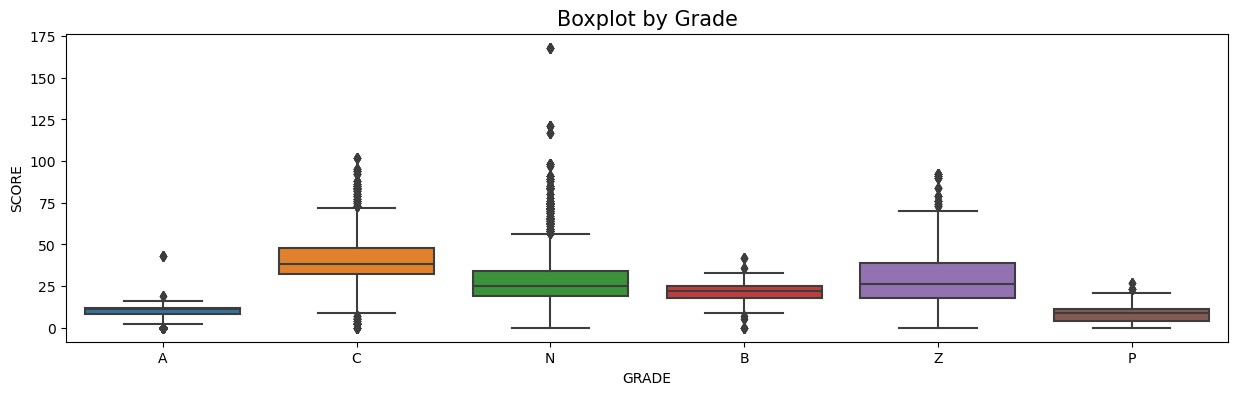

In [25]:
# Lets look at scores by grades with a Boxplot
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(x='GRADE', y='SCORE', data=rd)
plt.title('Boxplot by Grade', fontsize = 15)

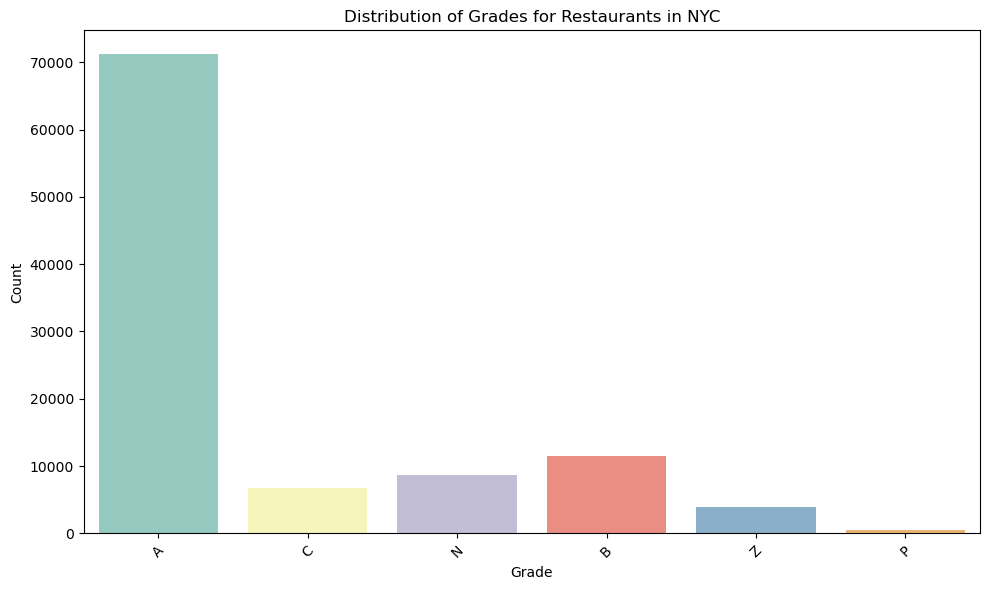

In [26]:
# Visualizing Distribution of Grades for Restaurants in NYC
plt.figure(figsize=(10, 6))
sns.countplot(data=rd, x='GRADE', palette='Set3')  
plt.title('Distribution of Grades for Restaurants in NYC')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## **Distribution of Cuisine Types**

In [27]:
# Filteriung out the irrelevant Cuisine Types for Visalization
min_cuisine_count = 1000
cuisine_counts = rd['CUISINE DESCRIPTION'].value_counts()
filtered_cuisines = cuisine_counts[cuisine_counts >= min_cuisine_count].index
fdf = rd[rd['CUISINE DESCRIPTION'].isin(filtered_cuisines)]

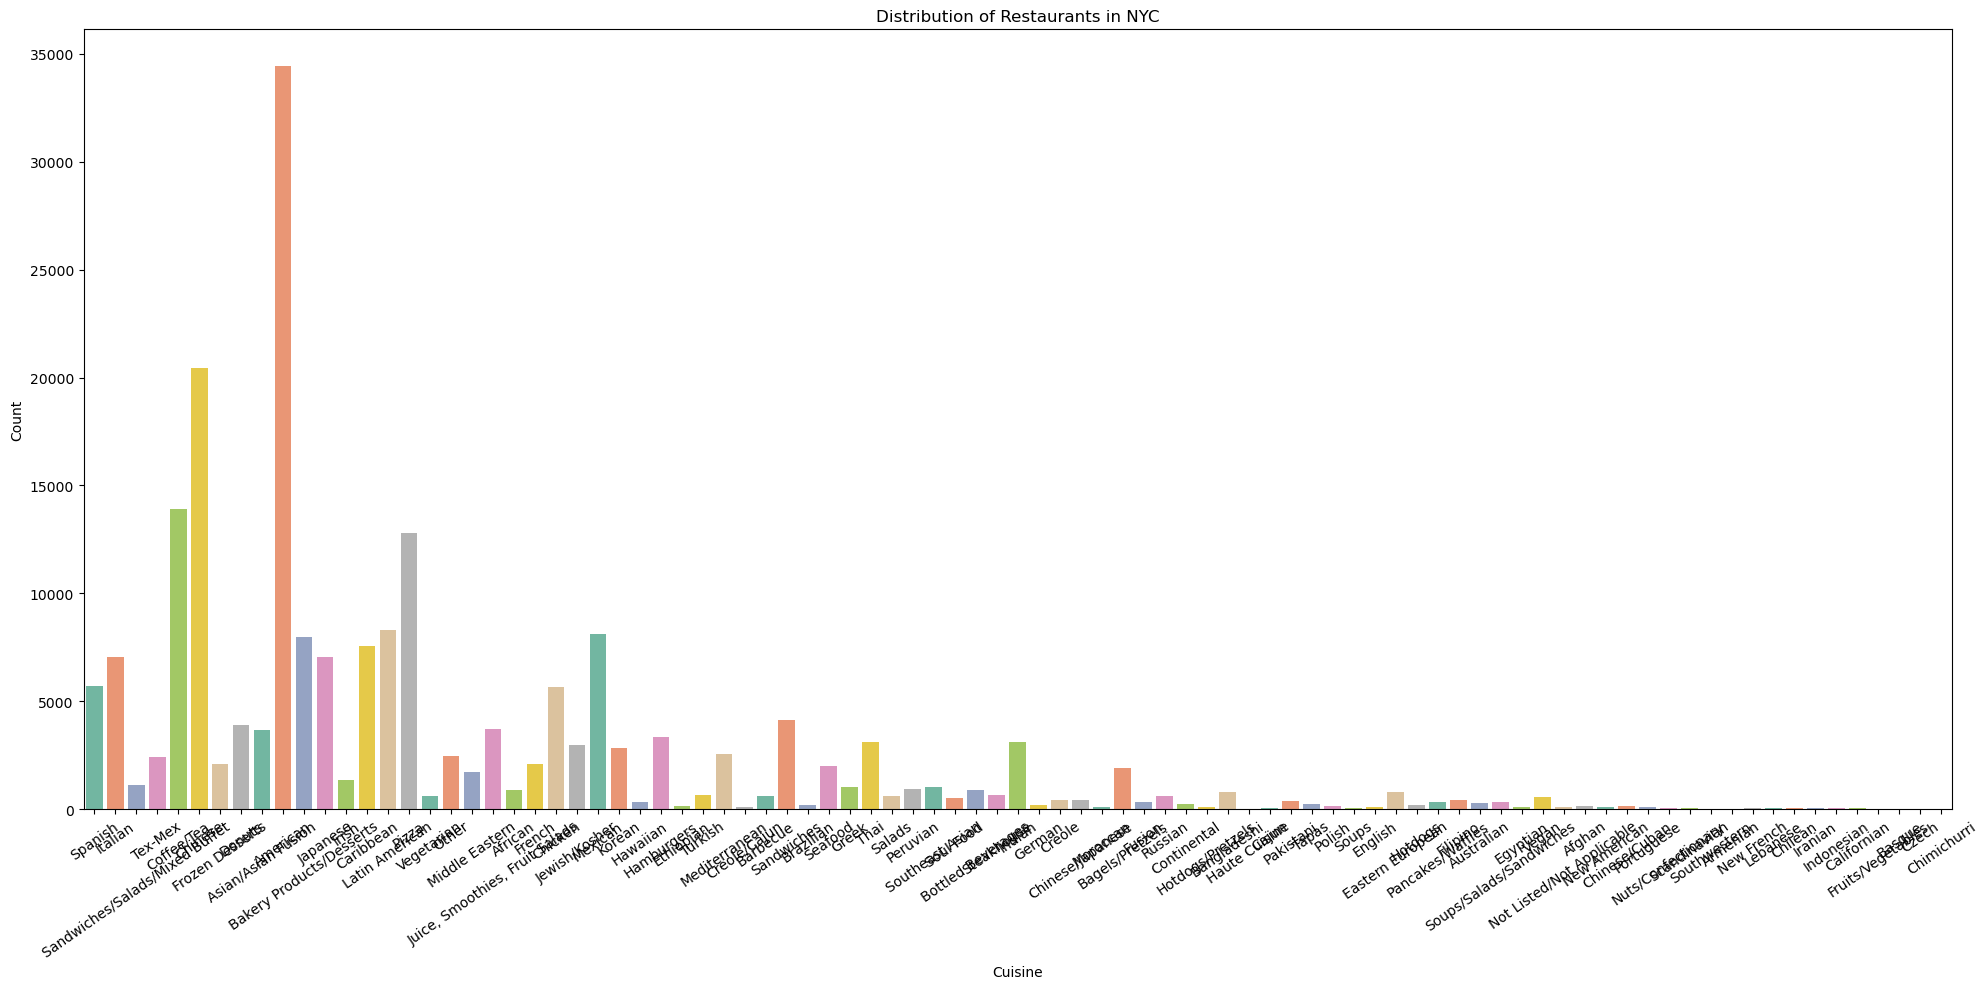

In [28]:
# Visualization of most popular cuisines
plt.figure(figsize=(20,10))
sns.countplot(data=f_df, x='CUISINE DESCRIPTION', palette='Set2') 
plt.title('Distribution of Restaurants in NYC')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=35) 

plt.tight_layout()
plt.show()

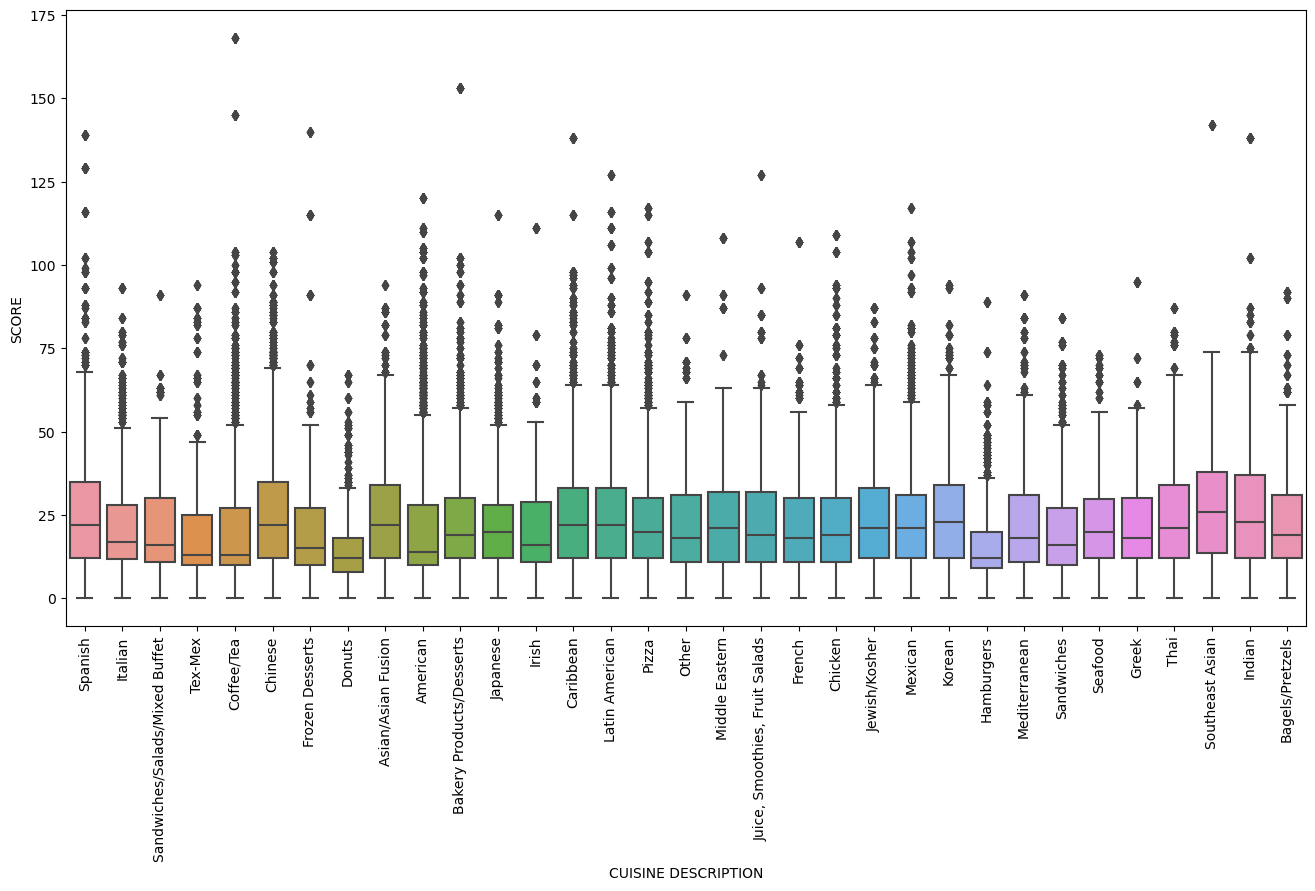

In [29]:
# Let us look at the scores by cuisine
score_cuisine = pd.concat([f_df['CUISINE DESCRIPTION'], f_df['SCORE']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x = 'CUISINE DESCRIPTION', y="SCORE", data = fdf)
plt.xticks(rotation=90);

# **Action Analysis**

In [30]:
rd.ACTION.value_counts()

ACTION
Violations were cited in the following area(s).                                                                                       195855
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.      7900
Establishment re-opened by DOHMH.                                                                                                       1869
No violations were recorded at the time of this inspection.                                                                             1160
Establishment re-closed by DOHMH.                                                                                                          4
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'No violations were recorded at the time of this inspection.'),
  Text(1, 0, 'Violations were cited in the following area(s).'),
  Text(2, 0, 'Establishment re-opened by DOHMH.'),
  Text(3, 0, 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.'),
  Text(4, 0, 'Establishment re-closed by DOHMH.')])

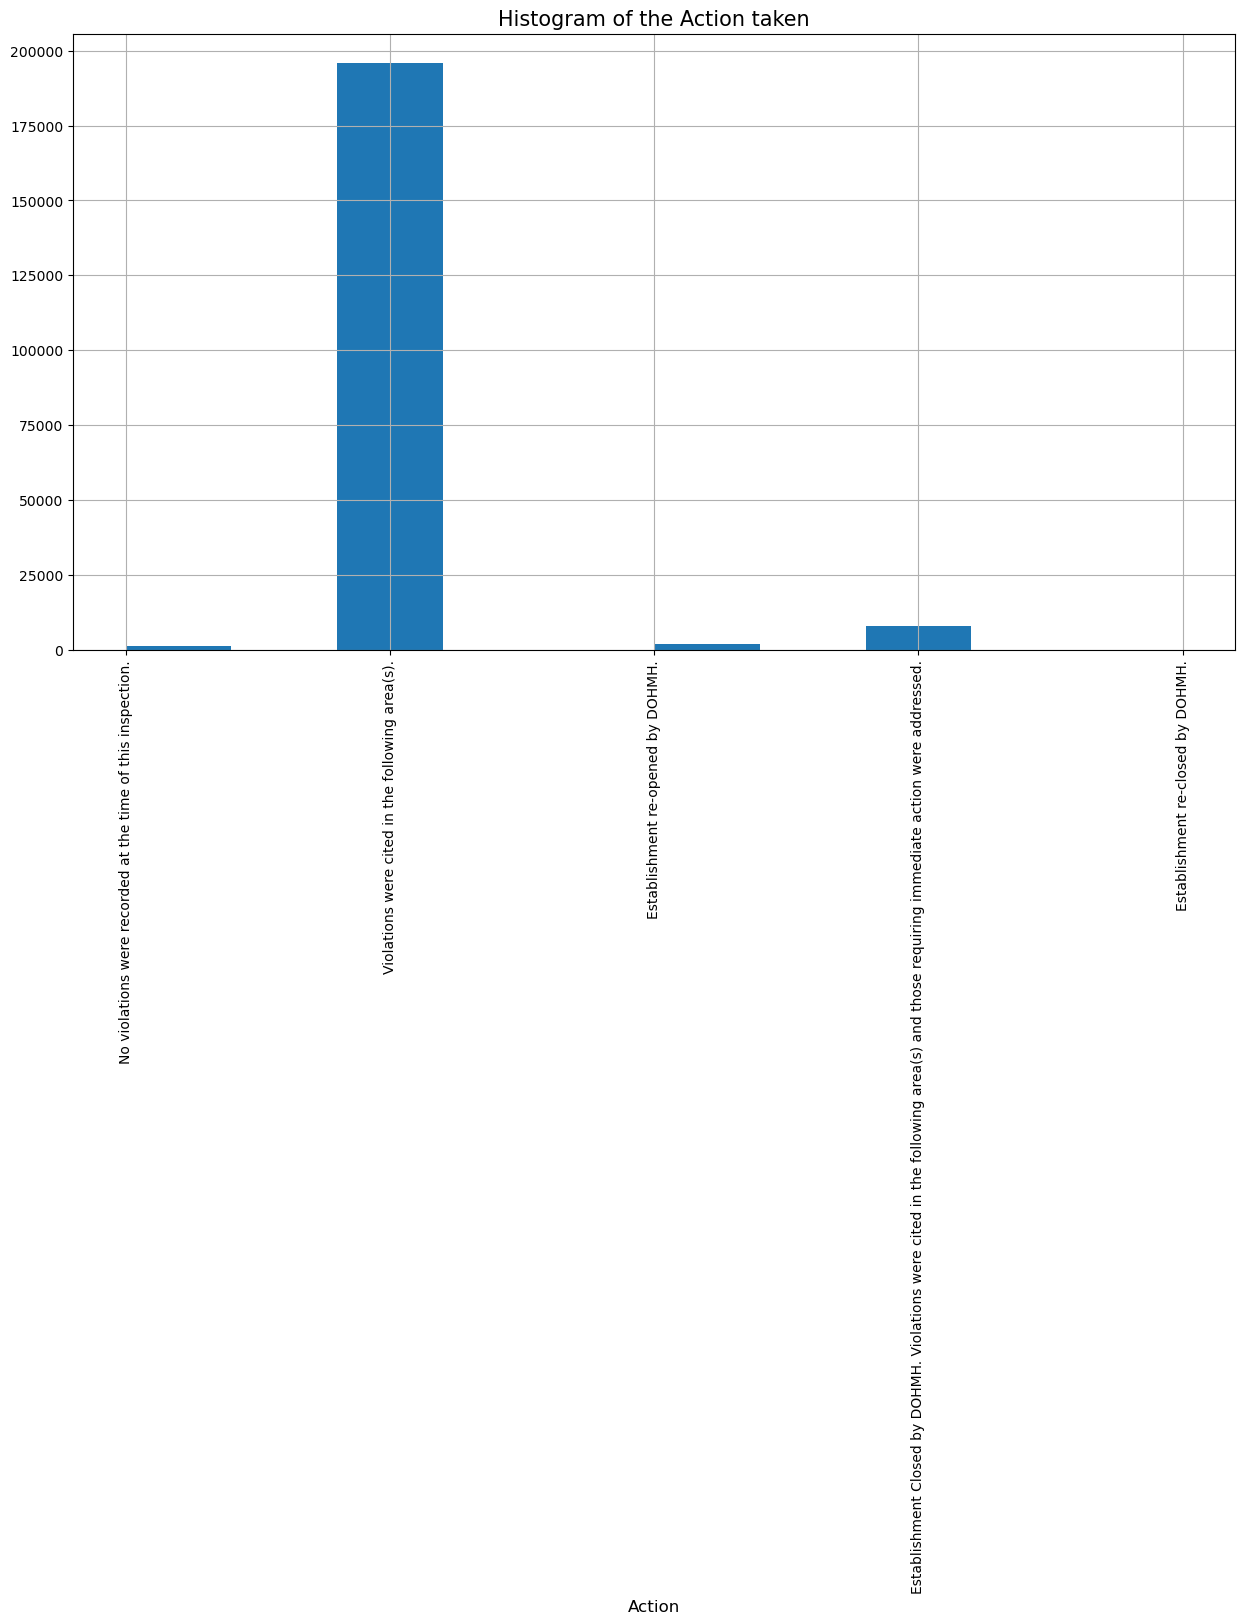

In [31]:
# Histogram of the Action taken
rd.ACTION.hist(figsize = (15,8))
plt.title('Histogram of the Action taken', fontsize = 15)
plt.xlabel('Action', fontsize = 12)
plt.xticks(rotation=90)

In [32]:
rd['CRITICAL FLAG'].value_counts()

CRITICAL FLAG
Critical          113813
Not Critical       90529
Not Applicable      4880
Name: count, dtype: int64

Text(0.5, 0, 'Flag')

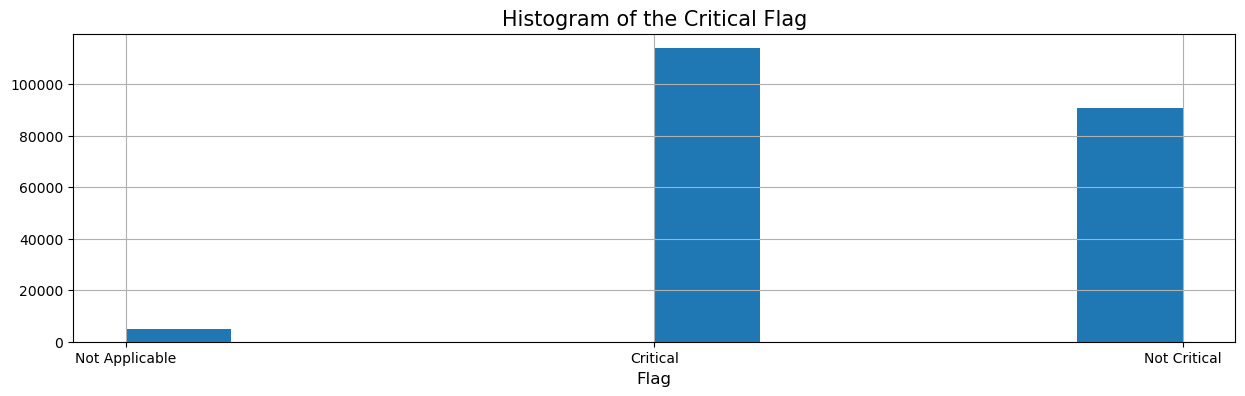

In [33]:
# Graphical representation of the critical flag
rd['CRITICAL FLAG'].hist(figsize=(15,4))
plt.title('Histogram of the Critical Flag', fontsize = 15)
plt.xlabel('Flag', fontsize = 12)

Text(0.5, 1.0, 'Critical Flag by Borough')

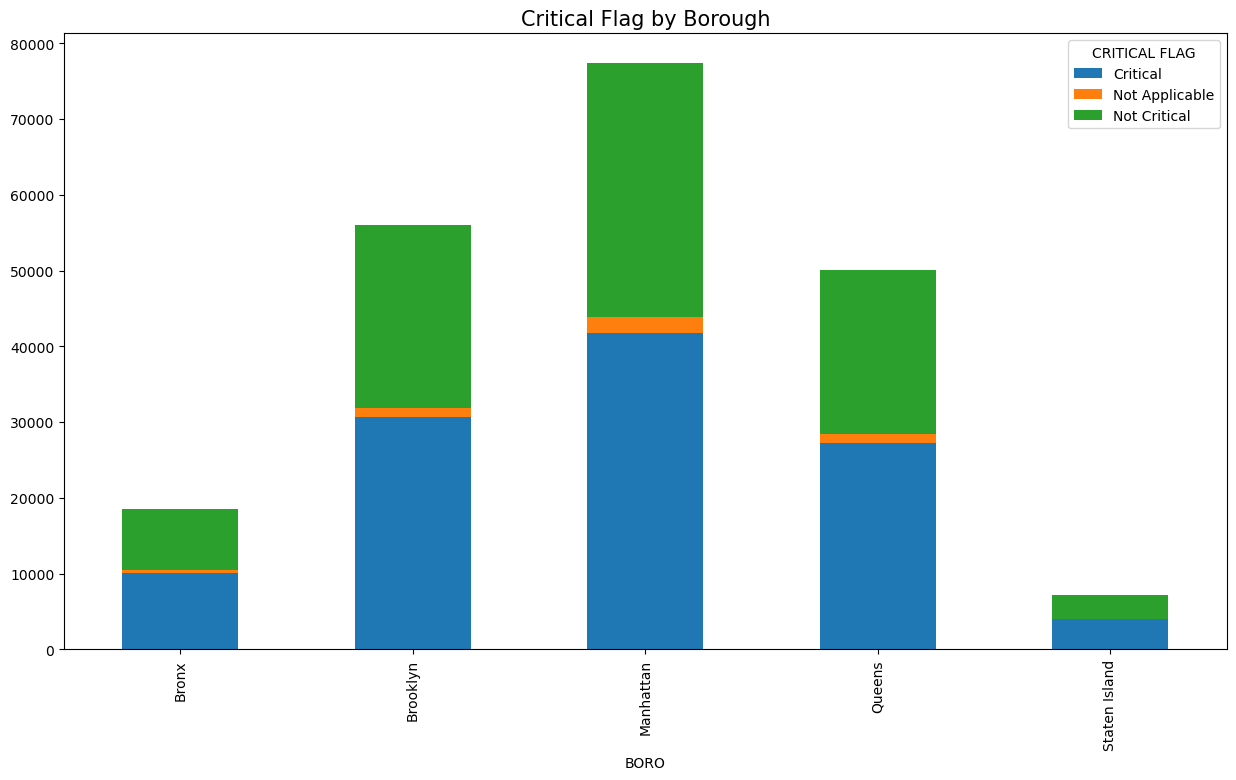

In [34]:
# Critical Flag by Borough
pd.crosstab(f_df.BORO, f_df['CRITICAL FLAG']).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Critical Flag by Borough', fontsize = 15)

Text(0.5, 1.0, 'Critical Flag by Cuisine')

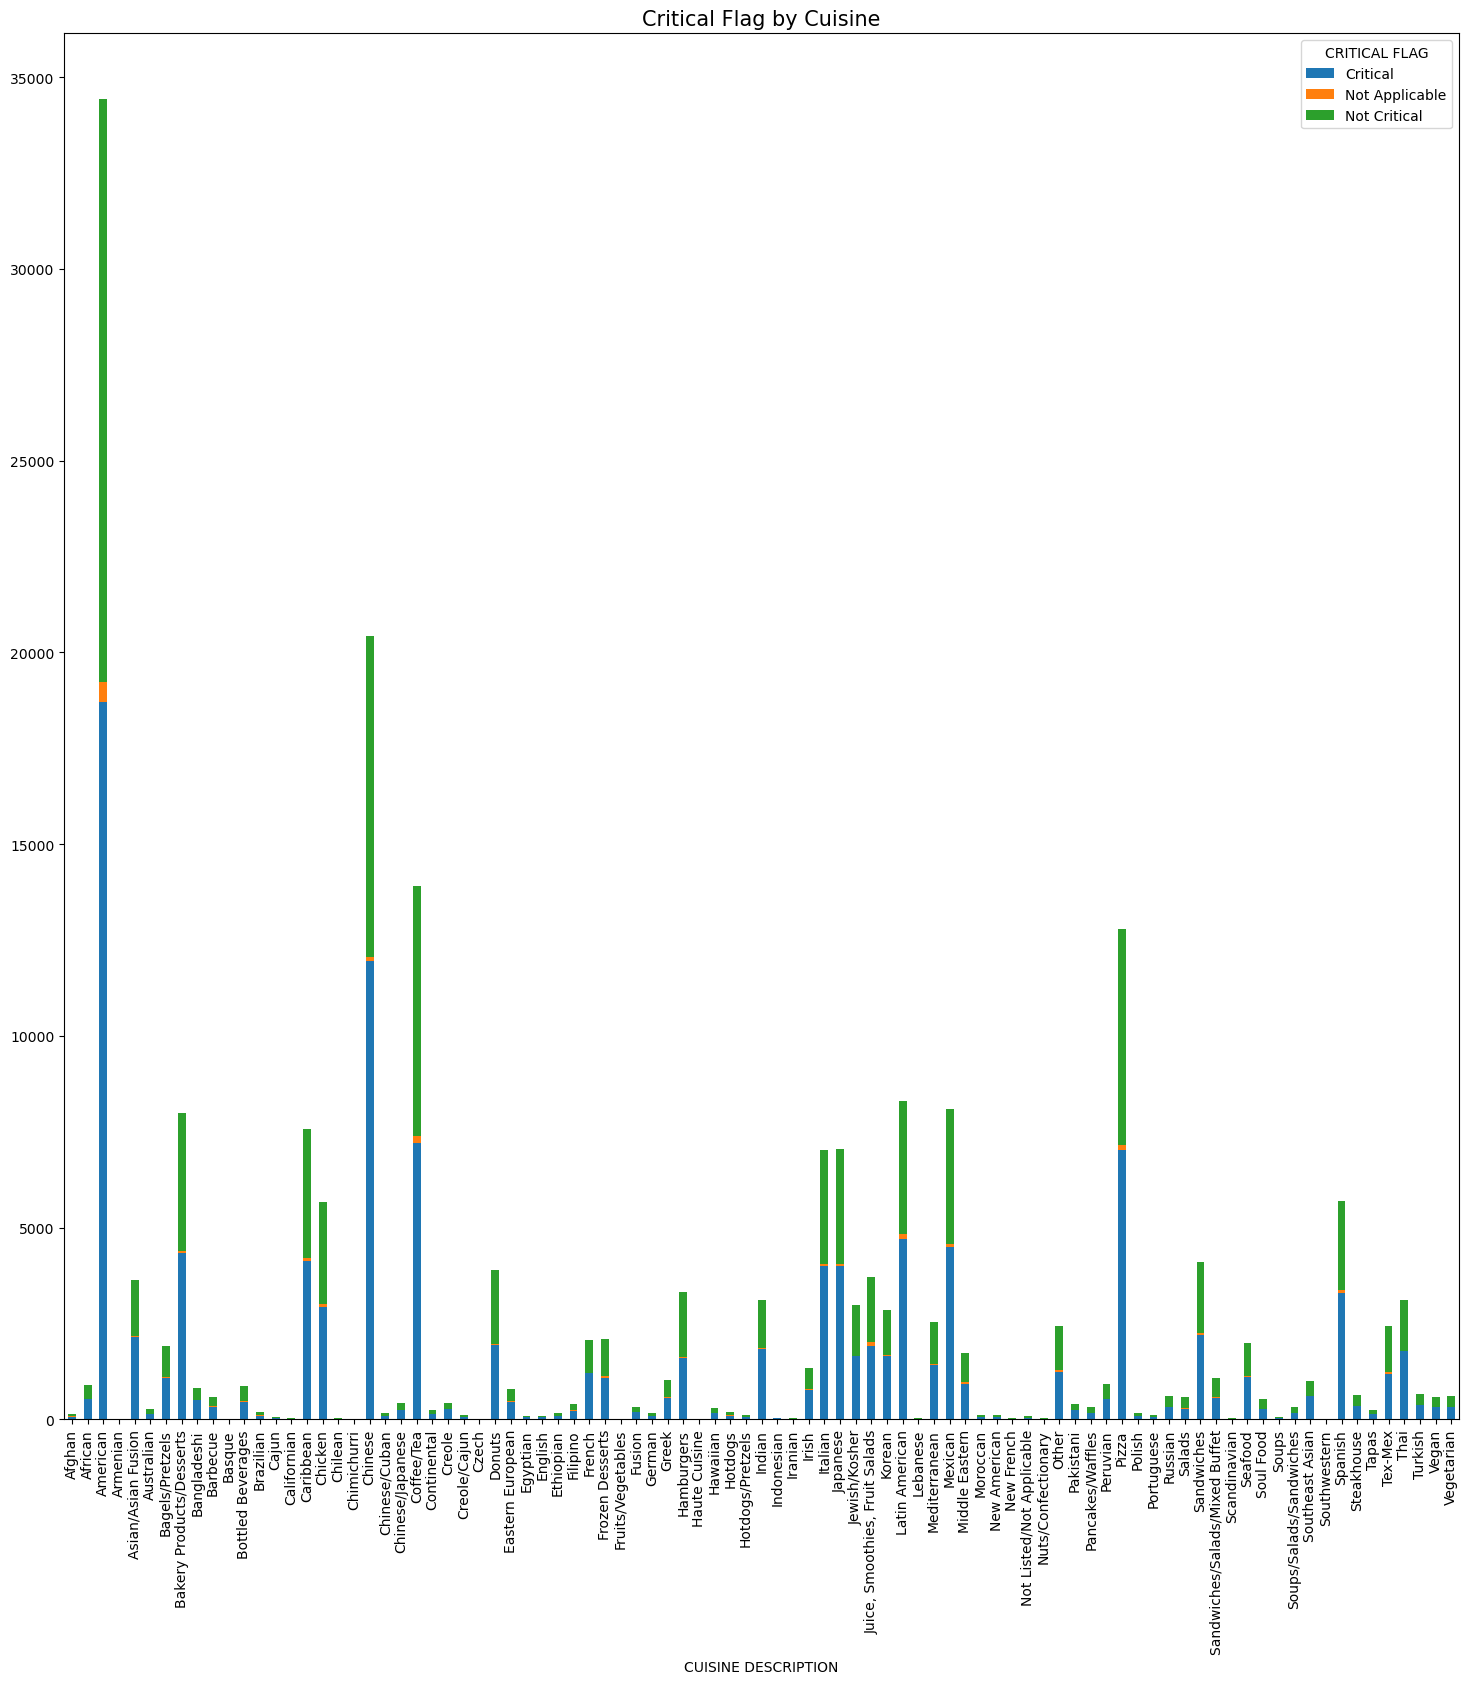

In [35]:
# Critical Flag by Cuisine
pd.crosstab(rd['CUISINE DESCRIPTION'], rd['CRITICAL FLAG']).plot(kind="bar", figsize=(18,18), stacked=True)
plt.title('Critical Flag by Cuisine', fontsize = 15)

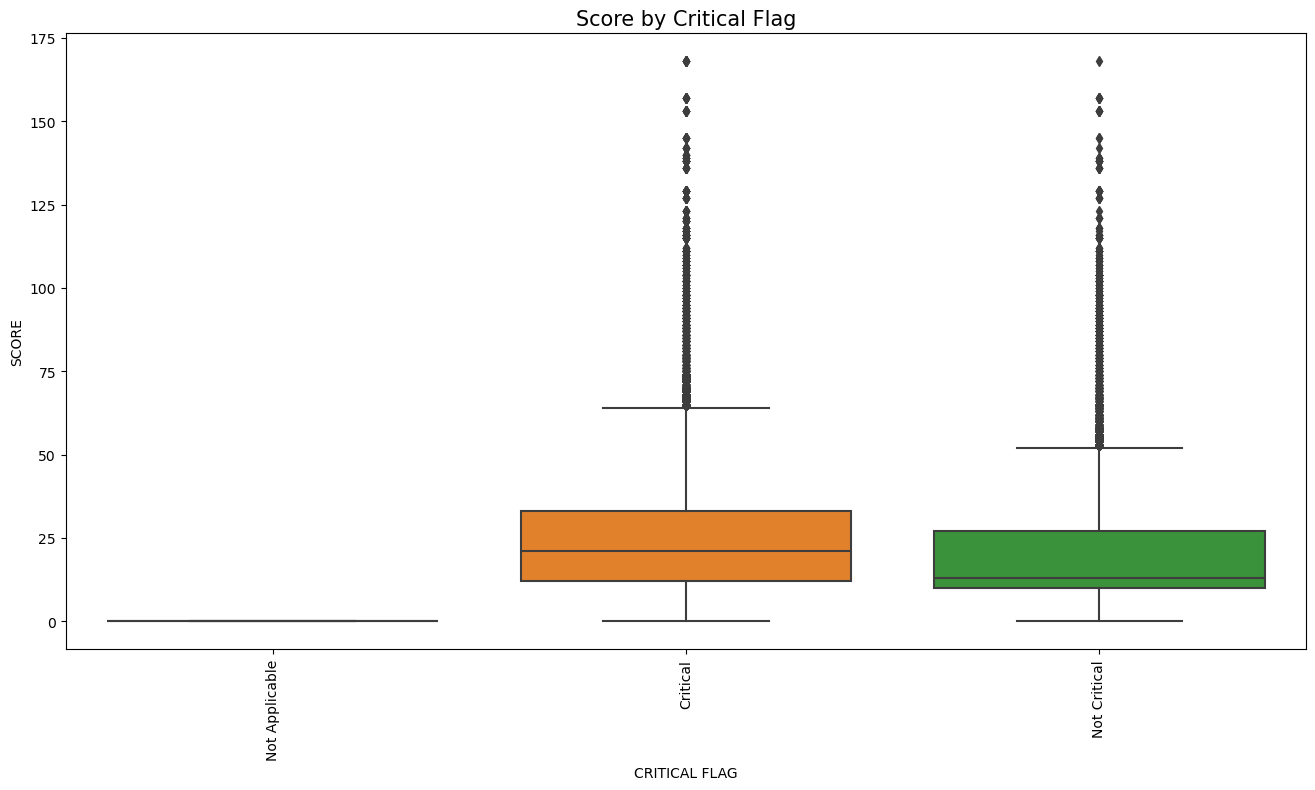

In [36]:
# Let us look at the scores by critical flag
score_flag = pd.concat([rd['CRITICAL FLAG'], rd['SCORE']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x = 'CRITICAL FLAG', y="SCORE", data = score_flag)
plt.title('Score by Critical Flag', fontsize = 15)
plt.xticks(rotation=90);

In [37]:
f_df['VIOLATION DESCRIPTION'].value_counts()

VIOLATION DESCRIPTION
Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                16440
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                         14050
Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                                                                                                                                                     13153
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improper

In [38]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()
    

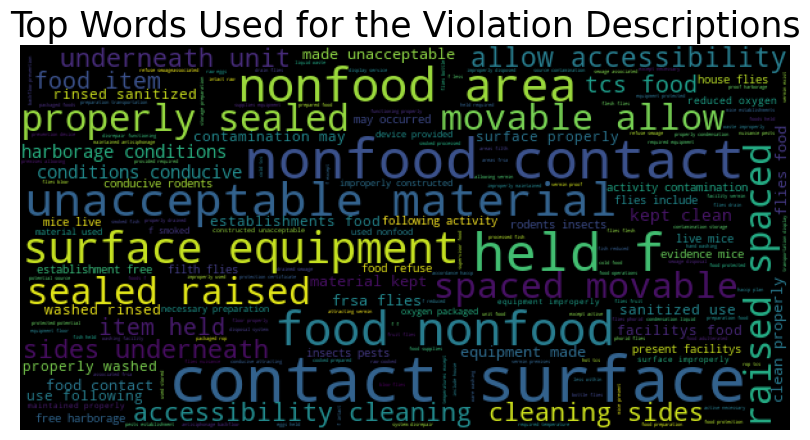

In [39]:
# Let us create a word cloud for the violation description
temp_data = rd.dropna(subset=['VIOLATION DESCRIPTION'])
# converting into lowercase
temp_data['VIOLATION DESCRIPTION'] = temp_data['VIOLATION DESCRIPTION'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['VIOLATION DESCRIPTION'] = temp_data['VIOLATION DESCRIPTION'].map(text_prepare)
# Wordcloud visual for most used words for Violation Desriptions
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(temp_data['VIOLATION DESCRIPTION'].values))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title("Top Words Used for the Violation Descriptions", fontsize=25)
plt.axis("off")
plt.show()